In [1]:
# Klasterizavimas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import math
from Skriptai.manofunkcijos import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.metrics import silhouette_score as shs
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from Skriptai.LKS94WGS84 import *
# shs(X,df['dbscan']) # surandame Average Silhouette Score

In [ ]:
# dabar implementuojam gridsearchcv:
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'eps':epsilon,
#     'min_samples':min_samples
# }
# dbscn = DBSCAN()
# grid_search = GridSearchCV(dbscn, param_grid, scoring='accuracy')
# grid_search.fit(X)

# best_eps = grid_search.best_params_['eps']
# best_min_samples = grid_search.best_params_['min_samples']

# print(best_eps, best_min_samples, sep='\n')

0.01
2


In [4]:
def GridSearch(combinations, X):
    '''
    Čia combinations - visos galimos epsilon ir minPts kombinacijos, kurias norime tikrinti
    X - data, kurią fitiname
    '''
    scores = [] # čia dėsime shs score
    all_labels = [] # čia dėsime predited labels
    for i, (eps, num_samples) in enumerate(combinations):
        predictions = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = predictions.labels_
        # ir klasterių pavadinimus: (jie gali kartotis, tad pasidarome set'ą - unikalių verčių sąrašą)
        clusters = list(set(labels))
        # randam klasterių kiekį:
        clusters_count = len(clusters)
        if -1 in clusters: # -1 žymimas noise, vadinasi, klasterių yra vienu mažiau, nei unikalių laibelių
            clusters_count = clusters_count - 1                      
        if (clusters_count < 2) and (clusters_count > 25): # jei rado mažiau nei 2 klasterius - blogai, turime dėmę
            # o viršutinė riba 25 - apsiribojame, kad nepridarytų belekiek klasterių, kas rodytų overfitinimą
            scores.append(-20)
            all_labels.append('Poor values')
            print(f'{i:4} iteracija skipinta', end='\r')
            continue
        if len(labels) > 2: # jei labelių bus 1 - silhouette fails, negalima toliau eiti
            try:
                scores.append(shs(X,labels))
                all_labels.append(labels)
                print(f'{i:4} iteracija pridėta', end="\r")
            except Exception as ex:
                print(f'{i:4} iteracija skipinta, klaida {ex}', end='\r')
    best_index = np.argmax(scores)
    best_params = combinations[best_index]
    best_labels = all_labels[best_index]
    best_score = scores[best_index]
    return {'eps':best_params[0], 'minPts':best_params[1],'labels':best_labels, 'score':best_score}


import itertools

# combinations = list(itertools.product(epsilon,min_samples))

# bp = GridSearch(combinations,X)

In [200]:
from Skriptai.LKS94WGS84 import *

In [ ]:
# 1: Klasterizuokite pirkėjus (k-Means, DBSCAN)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

# 2: Parašykite kodą, pagal parametrus nustatantį kokybę (quality)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

In [9]:
# 1: Klasterizuokite pirkėjus (k-Means, DBSCAN)
pirkejai = pd.read_csv('DATA/Mall_Customers.csv')

In [ ]:
# SUM OF SQAURED ERROR
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(df_check[['X','Y', 'Kaina_n']])
    sse.append(km.inertia_)

ax =sns.lineplot(x=[*range(1,20)], y=sse)
plt.show()

In [29]:
pirkejai

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_enc,cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,0,7
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,9
196,197,Female,45,126,28,0,8
197,198,Male,32,126,74,1,9
198,199,Male,32,137,18,1,8


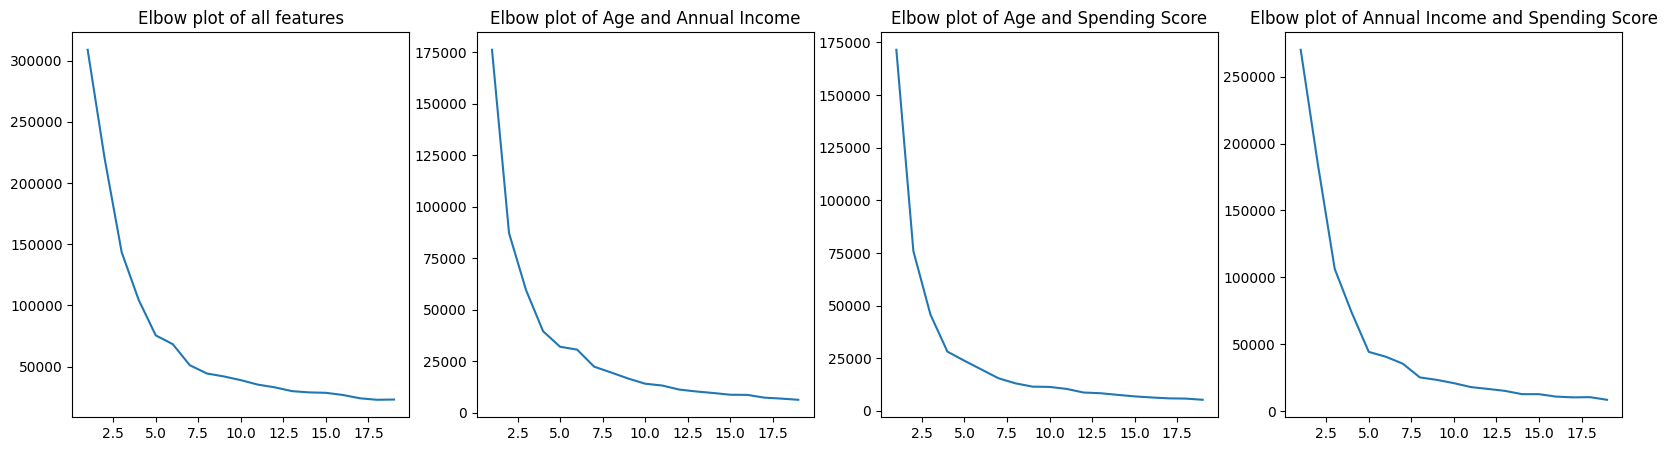

In [34]:
pirkejai['Gender_enc'] = LabelEncoder().fit_transform(pirkejai['Gender'])
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(pirkejai[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_enc']])
    sse.append(km.inertia_)
axes[0] =sns.lineplot(x=[*range(1,20)], y=sse, ax=axes[0])
axes[0].set_title('Elbow plot of all features')
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(pirkejai[['Age', 'Annual Income (k$)']])
    sse.append(km.inertia_)
axes[1] =sns.lineplot(x=[*range(1,20)], y=sse, ax=axes[1])
axes[1].set_title('Elbow plot of Age and Annual Income')
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(pirkejai[['Age', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
axes[2] =sns.lineplot(x=[*range(1,20)], y=sse, ax=axes[2])
axes[2].set_title('Elbow plot of Age and Spending Score')
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(pirkejai[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
axes[3] =sns.lineplot(x=[*range(1,20)], y=sse, ax=axes[3])
axes[3].set_title('Elbow plot of Annual Income and Spending Score')
plt.show()

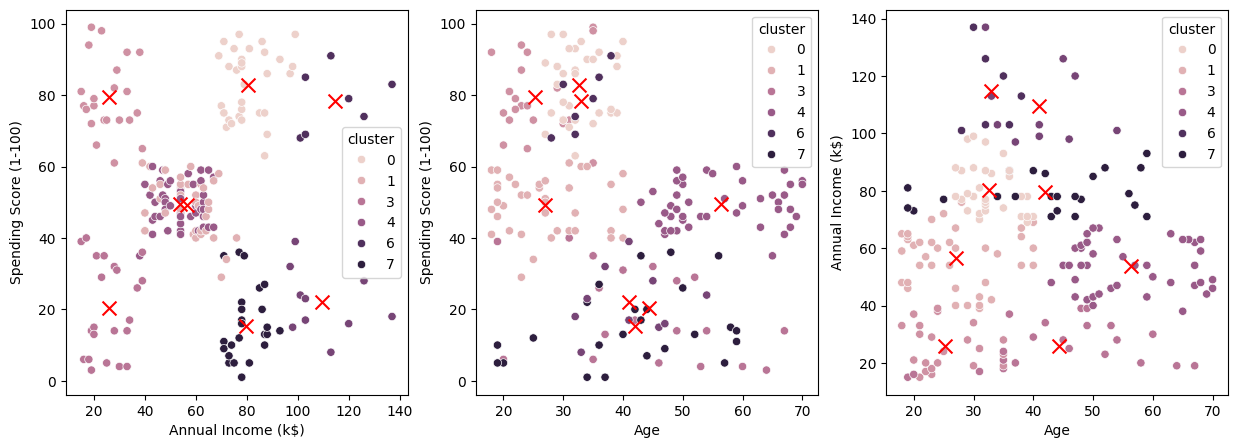

In [37]:
kmeans = KMeans(n_clusters=8)

predicted_labels = kmeans.fit_predict(pirkejai[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_enc']])
pirkejai['cluster'] = predicted_labels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=pirkejai, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', ax=axes[0])
axes[0].scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color='red', marker='x', s=100)
sns.scatterplot(data=pirkejai, x='Age', y='Spending Score (1-100)', hue='cluster', ax=axes[1])
axes[1].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], color='red', marker='x', s=100)
sns.scatterplot(data=pirkejai, x='Age', y='Annual Income (k$)', hue='cluster', ax=axes[2])
axes[2].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.show()

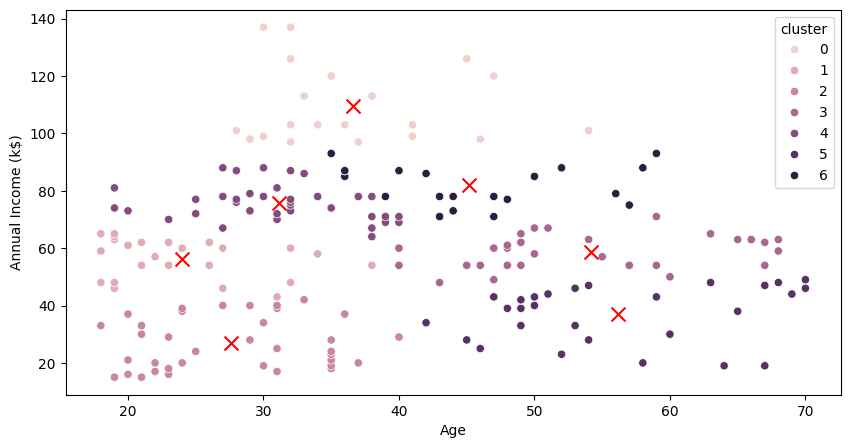

In [42]:
kmeans = KMeans(n_clusters=7)

predicted_labels = kmeans.fit_predict(pirkejai[['Age', 'Annual Income (k$)']])
pirkejai['cluster'] = predicted_labels
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=pirkejai, x='Age', y='Annual Income (k$)', hue='cluster', ax=axes)
axes.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.show()

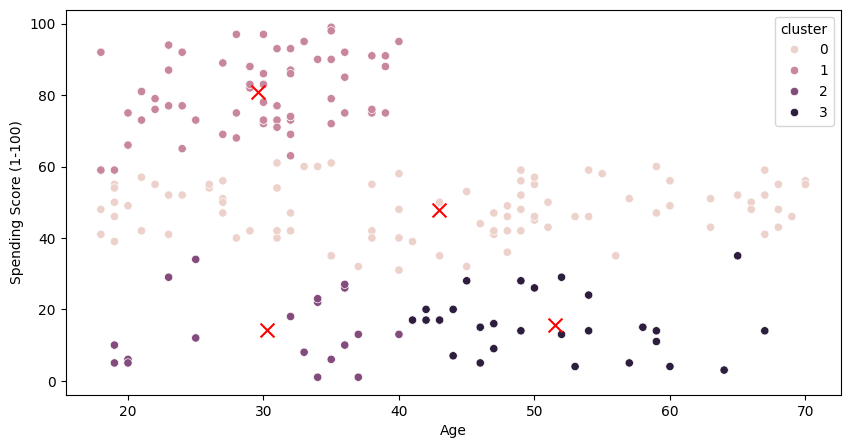

In [43]:
km = KMeans(n_clusters=4)
predicted_labels = km.fit_predict(pirkejai[['Age', 'Spending Score (1-100)']])
pirkejai['cluster'] = predicted_labels
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=pirkejai, x='Age', y='Spending Score (1-100)', hue='cluster', ax=axes)
axes.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.show()

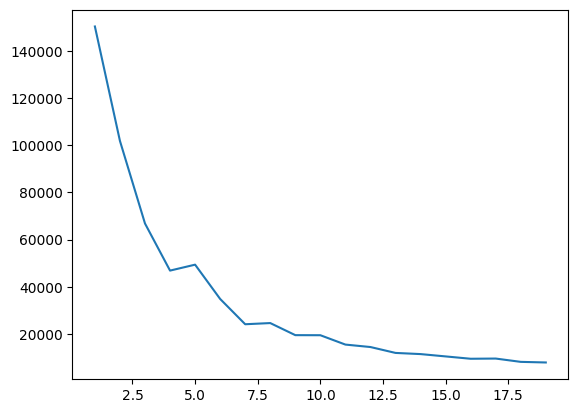

In [46]:
moterys = pirkejai.query('Gender == "Male"')
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(moterys[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
ax =sns.lineplot(x=[*range(1,20)], y=sse)
plt.show()

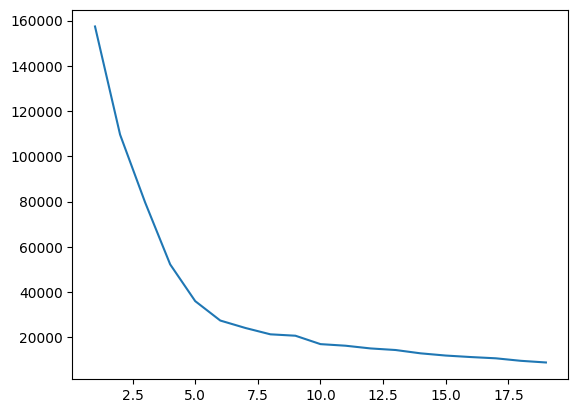

In [48]:
vyrai = pirkejai.query('Gender == "Female"')
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(vyrai[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
ax =sns.lineplot(x=[*range(1,20)], y=sse)
plt.show()

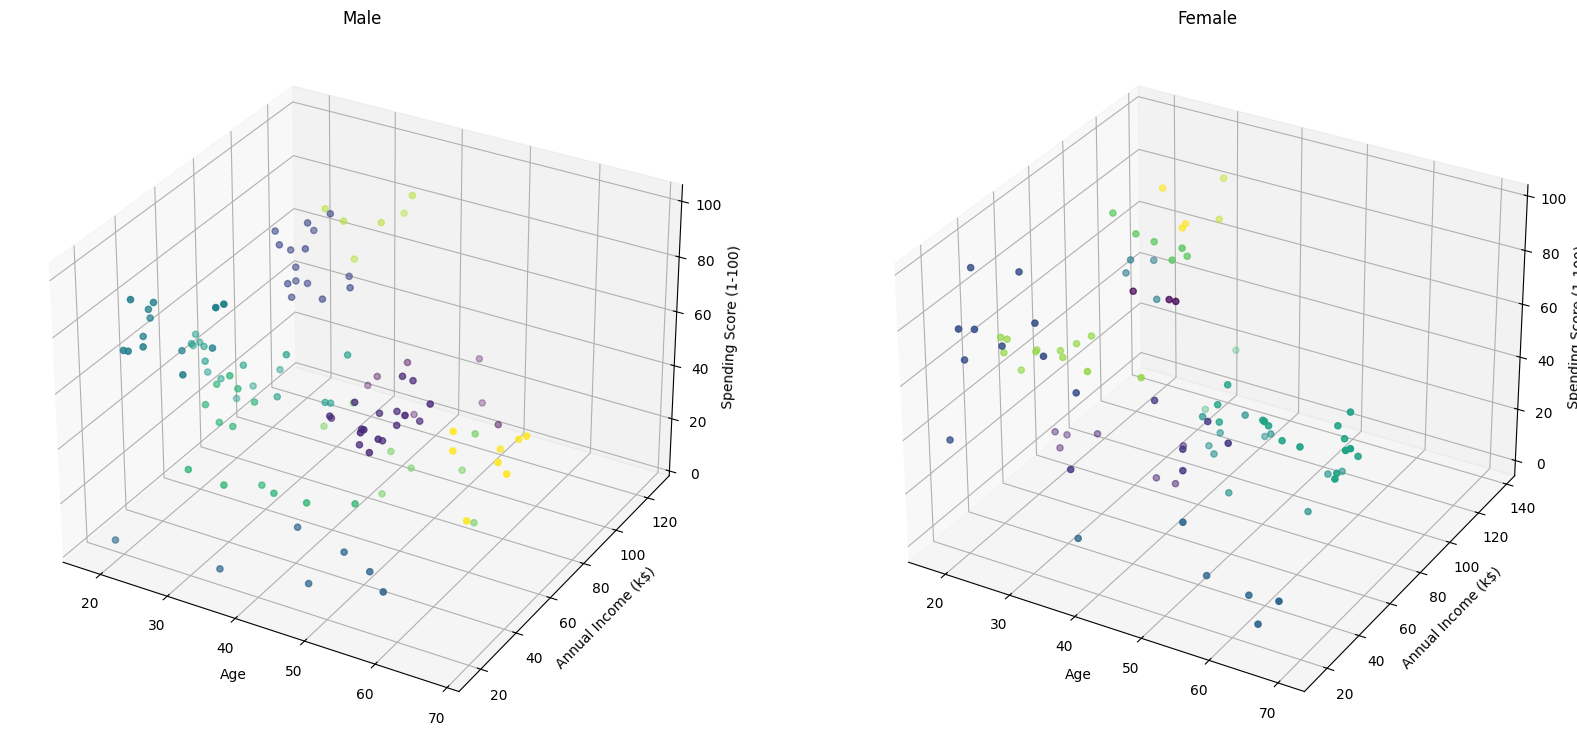

In [50]:
from mpl_toolkits.mplot3d import Axes3D

kmeans_moterys = KMeans(n_clusters=13)
predicted_labels = kmeans_moterys.fit_predict(moterys[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
moterys['cluster'] = predicted_labels
kmeans_vyrai = KMeans(n_clusters=10)
predicted_labels = kmeans_vyrai.fit_predict(vyrai[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
vyrai['cluster'] = predicted_labels
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Male
male_data = vyrai
ax1.scatter(male_data['Age'], male_data['Annual Income (k$)'], male_data['Spending Score (1-100)'], c=male_data['cluster'], cmap='viridis')
ax1.set_title('Male')
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income (k$)')
ax1.set_zlabel('Spending Score (1-100)')

# Female
female_data = moterys
ax2.scatter(female_data['Age'], female_data['Annual Income (k$)'], female_data['Spending Score (1-100)'], c=female_data['cluster'], cmap='viridis')
ax2.set_title('Female')
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_zlabel('Spending Score (1-100)')

plt.show()

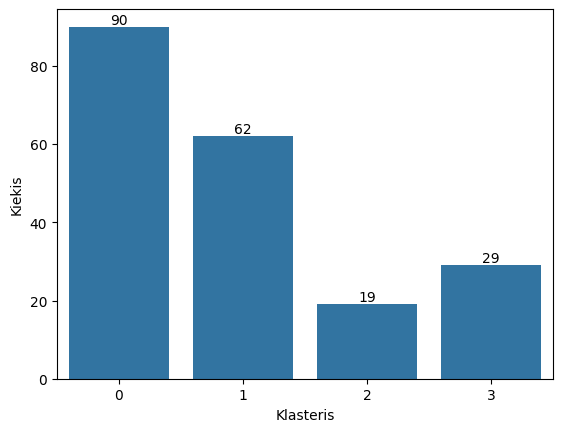

In [51]:
pirkejai['cluster'].value_counts()
fig, ax = plt.subplots()
ax = sns.barplot(x=pirkejai['cluster'].value_counts().index, y=pirkejai['cluster'].value_counts().values)
ax.set_ylabel('Kiekis')
ax.set_xlabel('Klasteris')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [83]:
# 2: Parašykite kodą, pagal parametrus nustatantį kokybę (quality)
quality = pd.read_csv('DATA/winequality-red.csv')

In [52]:
quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


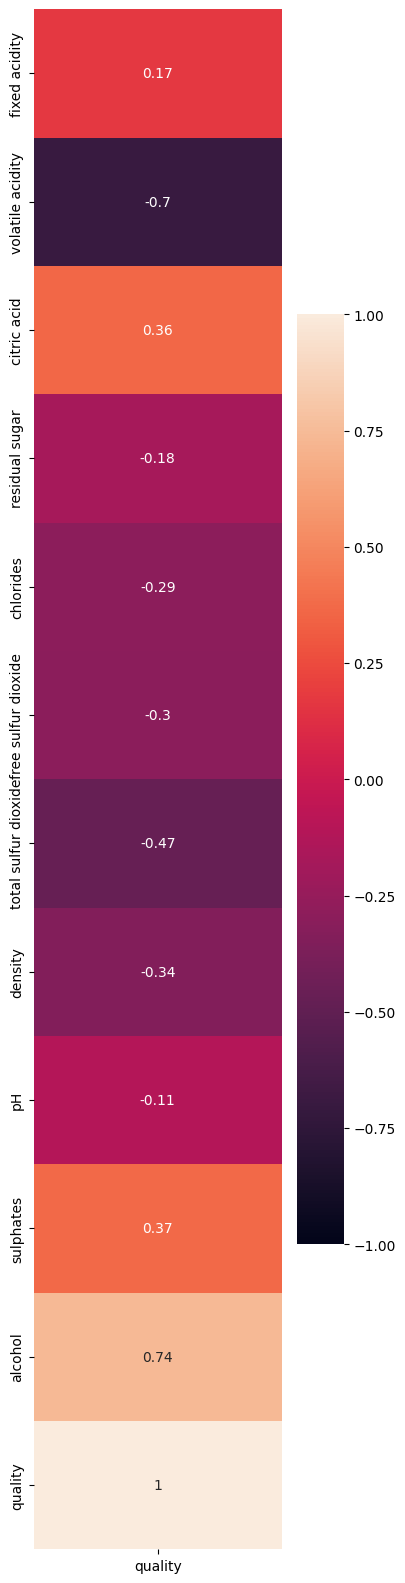

In [84]:
correlation = quality.corr()
fig, axis = plt.subplots(figsize= [4,20])
sns.heatmap(data=correlation.corr()['quality'].to_frame(), vmin=-1, vmax=1, annot=True, ax=axis)
plt.show()

In [95]:
quality_for_clustering = quality[['fixed acidity', 'residual sugar', 'pH']]
quality_for_clustering = StandardScaler().fit_transform(quality_for_clustering)


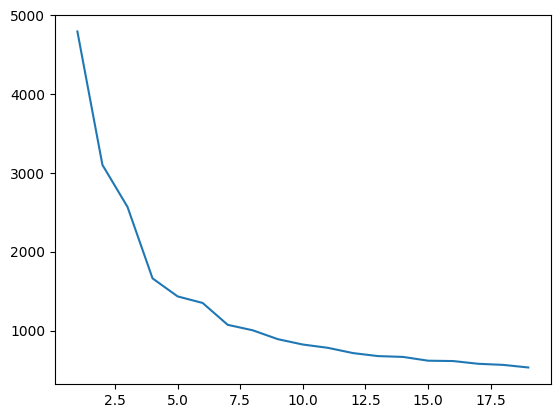

In [97]:
sse =[]
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(quality_for_clustering)
    sse.append(km.inertia_)
ax =sns.lineplot(x=[*range(1,20)], y=sse)
plt.show()

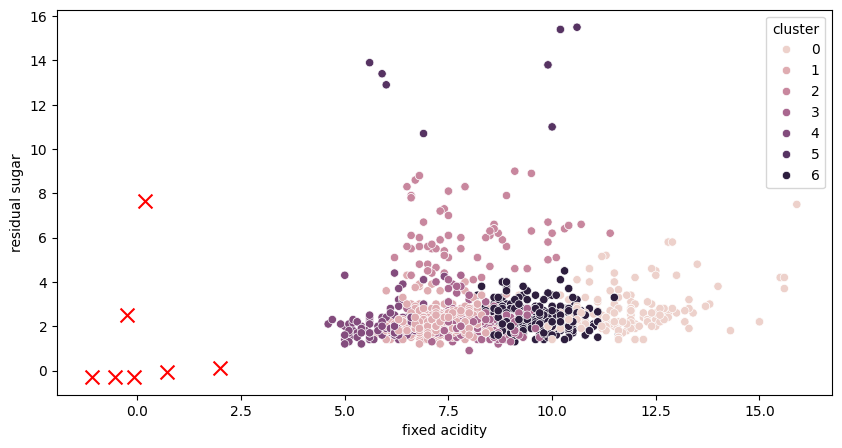

In [110]:
kmeans = KMeans(n_clusters=7)
predicted_labels = kmeans.fit_predict(quality_for_clustering)
quality['cluster'] = predicted_labels
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=quality, x='fixed acidity', y='residual sugar', hue='cluster', ax=axes)
axes.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='x', s=100)
plt.show()

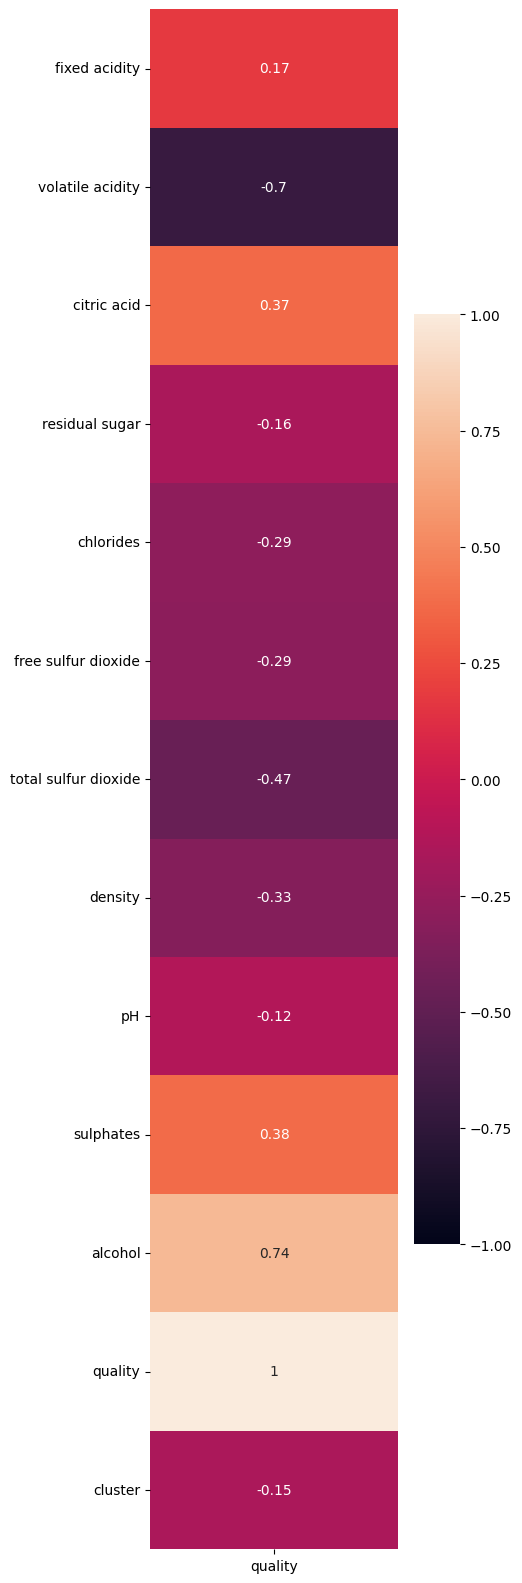

In [113]:
correlation = quality.corr()
fig, axis = plt.subplots(figsize= [4,20])
sns.heatmap(data=correlation.corr()['quality'].to_frame(), vmin=-1, vmax=1, annot=True, ax=axis)
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error



In [169]:
X = quality.drop(columns=['quality', 'cluster'])
y = quality['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [170]:
# randomforest = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X, y)
randomforest = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train, y_train)
y_predicted = randomforest.predict(X_test)
# y_predicted = randomforest.predict(X)
print(f'Random forest vertinimas: {randomforest.score(X_test, y_test)*100.0}')

Random forest vertinimas: 97.33632265873669


In [171]:
# decisiontree = DecisionTreeRegressor(random_state=42).fit(X, y)
decisiontree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_predicted = decisiontree.predict(X_test)
# y_predicted = decisiontree.predict(X_test)
print(f'Decision tree vertinimas: {decisiontree.score(X_test, y_test)*100.0}')

Decision tree vertinimas: 98.08723979736696


In [172]:
# linear = LinearRegression().fit(X, y)
linear = LinearRegression().fit(X_train, y_train)
y_predicted = linear.predict(X_test)
# y_predicted = linear.predict(X_test)
print(f'Linear regression vertinimas: {linear.score(X_test, y_test)*100.0}')

Linear regression vertinimas: 92.10017225217501


In [173]:
# logistic = LogisticRegression().fit(X, y)
logistic = LogisticRegression().fit(X_train, y_train)
y_predicted = logistic.predict(X_test)
# y_predicted = logistic.predict(X_test)
print(f'Logistic regression vertinimas: {logistic.score(X_test, y_test)*100.0}')

Logistic regression vertinimas: 85.3125


In [160]:
def predict_wine_quality(params):
    """
    Predicts wine quality using different regression models.
    
    Parameters:
    params (dict): A dictionary containing the wine parameters.
    
    Returns:
    dict: A dictionary containing the predictions from different models.
    """
    # Convert the input parameters to a DataFrame
    input_data = pd.DataFrame([params])
    
    # Standardize the input data
    scaler = StandardScaler().fit(X_train)
    input_data_scaled = scaler.transform(input_data)
    
    # Predict using different models
    predictions = {}
    predictions['RandomForest'] = randomforest.predict(input_data_scaled)[0]
    predictions['DecisionTree'] = decisiontree.predict(input_data_scaled)[0]
    predictions['LinearRegression'] = linear.predict(input_data_scaled)[0]
    predictions['LogisticRegression'] = logistic.predict(input_data_scaled)[0]
    
    return predictions



In [164]:

quality['RandomForest_Prediction'] = randomforest.predict(X)
quality['DecisionTree_Prediction'] = decisiontree.predict(X)
quality['LinearRegression_Prediction'] = linear.predict(X)
quality['LogisticRegression_Prediction'] = logistic.predict(X)


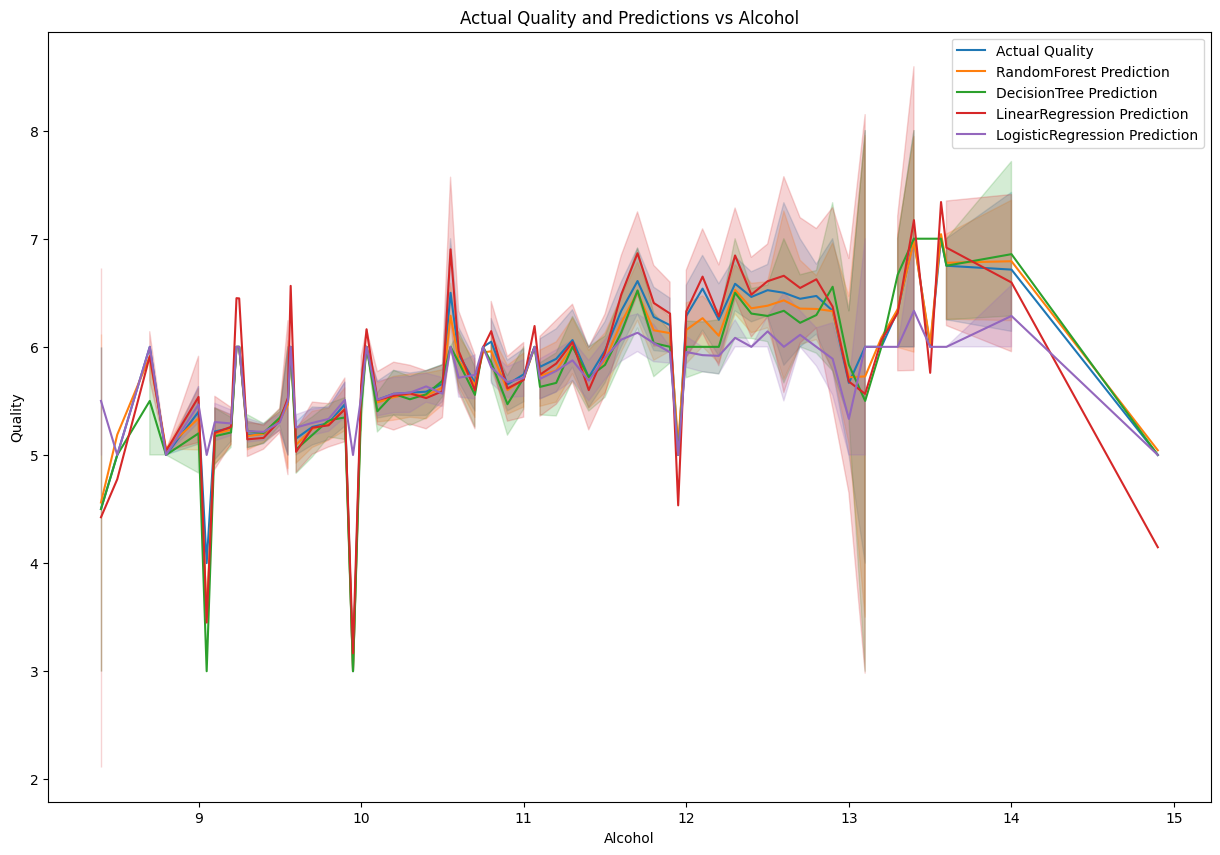

In [165]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=quality, x='alcohol', y='quality', label='Actual Quality', ax=ax)
sns.lineplot(data=quality, x='alcohol', y='RandomForest_Prediction', label='RandomForest Prediction', ax=ax)
sns.lineplot(data=quality, x='alcohol', y='DecisionTree_Prediction', label='DecisionTree Prediction', ax=ax)
sns.lineplot(data=quality, x='alcohol', y='LinearRegression_Prediction', label='LinearRegression Prediction', ax=ax)
sns.lineplot(data=quality, x='alcohol', y='LogisticRegression_Prediction', label='LogisticRegression Prediction', ax=ax)
ax.set_title('Actual Quality and Predictions vs Alcohol')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Quality')
plt.legend()
plt.show()

In [167]:
X = quality.drop(columns=['quality', 'cluster'])
y = quality['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

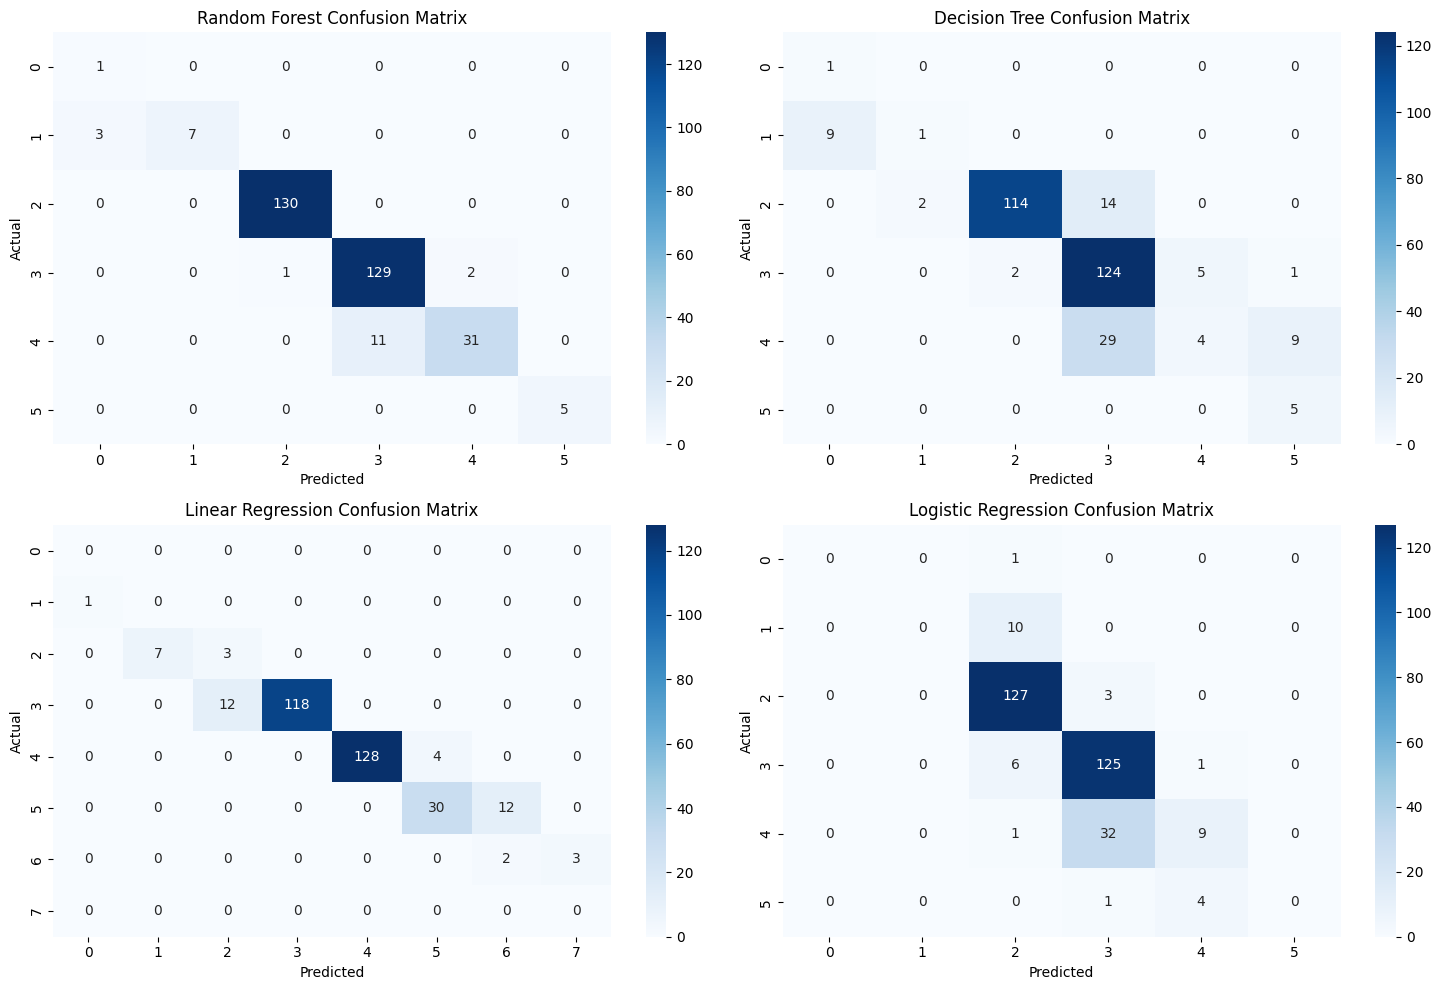

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

y_pred_rf = randomforest.predict(X_test)
y_pred_dt = decisiontree.predict(X_test)
y_pred_lr = linear.predict(X_test)
y_pred_log = logistic.predict(X_test)

y_pred_rf = y_pred_rf.round().astype(int)
y_pred_dt = y_pred_dt.round().astype(int)
y_pred_lr = y_pred_lr.round().astype(int)
y_pred_log = y_pred_log.round().astype(int)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_log = confusion_matrix(y_test, y_pred_log)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Random Forest Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm_dt, annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Decision Tree Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Linear Regression Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm_log, annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('Logistic Regression Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()